In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [16]:
# 데이터 불러오기
# 2016-08-01부터 2018-07-31까지 2년동안의 카드 매출내역 데이터이다.
train = pd.read_csv("train.csv")
train.shape

(3362796, 8)

In [17]:
# 데이터 정보
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


In [18]:
train["date"]

0          2016-12-14
1          2016-12-14
2          2016-12-19
3          2016-12-19
4          2016-12-19
              ...    
3362791    2018-07-19
3362792    2018-07-19
3362793    2018-07-22
3362794    2018-07-25
3362795    2018-07-30
Name: date, Length: 3362796, dtype: object

In [19]:
train["year-month"] = train["date"].apply(lambda x: x[:7])
train

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year-month
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,2016-12
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,2016-12
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,2016-12
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,2016-12
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,2016-12
...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0,2018-07
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0,2018-07
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0,2018-07
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0,2018-07


In [20]:
train["date"] = train["date"].astype("datetime64[ns]")

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   store_id      int64         
 1   date          datetime64[ns]
 2   time          object        
 3   card_id       object        
 4   amount        int64         
 5   installments  float64       
 6   days_of_week  int64         
 7   holyday       int64         
 8   year-month    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 230.9+ MB


In [22]:
train.tail()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year-month
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0,2018-07
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0,2018-07
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0,2018-07
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0,2018-07
3362795,1799,2018-07-30,10:58:53,42d354807a,325,NaN,0,0,2018-07


In [23]:
train.count()

store_id        3362796
date            3362796
time            3362796
card_id         3362796
amount          3362796
installments      16860
days_of_week    3362796
holyday         3362796
year-month      3362796
dtype: int64

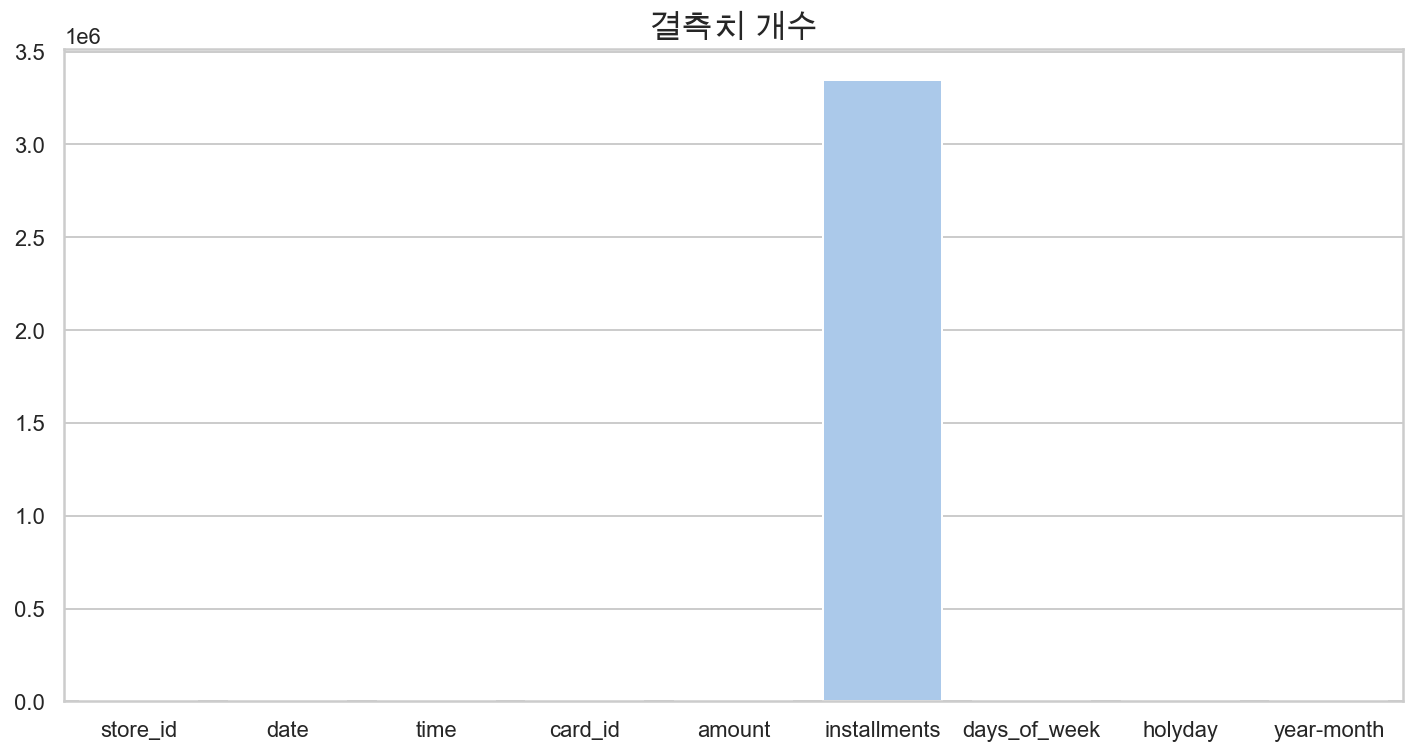

In [24]:
plt.figure(figsize=(12, 6))
sns.set_color_codes('pastel')
plt.title("결측치 개수", fontsize=16)
sns.barplot(x=train.columns, y=train.isnull().sum(), color="b");

In [25]:
train["installments"] = train["installments"].fillna(1)

In [26]:
# 결측치를 채웠으니 다시 확인해보자!
train.count()

store_id        3362796
date            3362796
time            3362796
card_id         3362796
amount          3362796
installments    3362796
days_of_week    3362796
holyday         3362796
year-month      3362796
dtype: int64

In [27]:
train.tail()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year-month
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,2018-07
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,2018-07
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,2018-07
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,2018-07
3362795,1799,2018-07-30,10:58:53,42d354807a,325,1.0,0,0,2018-07


In [28]:
train_unique = []
for i in train.columns.values:
    train_unique.append(len(train[i].unique()))
unique_train = pd.DataFrame()
unique_train['Columns'] = list(train.columns)
unique_train['Unique_value'] = train_unique
unique_train

,Columns,Unique_value
0,store_id,1775
1,date,730
2,time,85924
3,card_id,922522
4,amount,6031
5,installments,17
6,days_of_week,7
7,holyday,2
8,year-month,24


In [29]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day


train['hour'] = train['time'].apply(lambda x: x[0:2])
train['hour'] = train['hour'].astype('int')

train['weekend'] = train['days_of_week'].apply(lambda x: 1 if x > 4 else 0)

In [30]:
train.tail(10)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,year-month,year,month,day,hour,weekend
3362786,1799,2018-07-10,18:00:55,560b85cb59,325,1.0,1,0,2018-07,2018,7,10,18,0
3362787,1799,2018-07-11,11:57:34,fcf1b338aa,350,1.0,2,0,2018-07,2018,7,11,11,0
3362788,1799,2018-07-15,18:24:57,b96ac1d7a8,275,1.0,6,0,2018-07,2018,7,15,18,1
3362789,1799,2018-07-17,11:26:44,b7846c9389,350,1.0,1,0,2018-07,2018,7,17,11,0
3362790,1799,2018-07-17,14:44:54,e73e0f0390,350,1.0,1,0,2018-07,2018,7,17,14,0
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,2018-07,2018,7,19,17,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,2018-07,2018,7,19,18,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,2018-07,2018,7,22,14,1
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,2018-07,2018,7,25,18,0
3362795,1799,2018-07-30,10:58:53,42d354807a,325,1.0,0,0,2018-07,2018,7,30,10,0


In [31]:
monthly_sales = train.groupby("year-month").sum()["amount"].reset_index()
monthly_sales

,year-month,amount
0,2016-08,12756434
1,2016-09,12677639
2,2016-10,13678894
3,2016-11,13536624
4,2016-12,16735969
5,2017-01,15694901
6,2017-02,15371998
7,2017-03,18033087
8,2017-04,18736403
9,2017-05,19134008


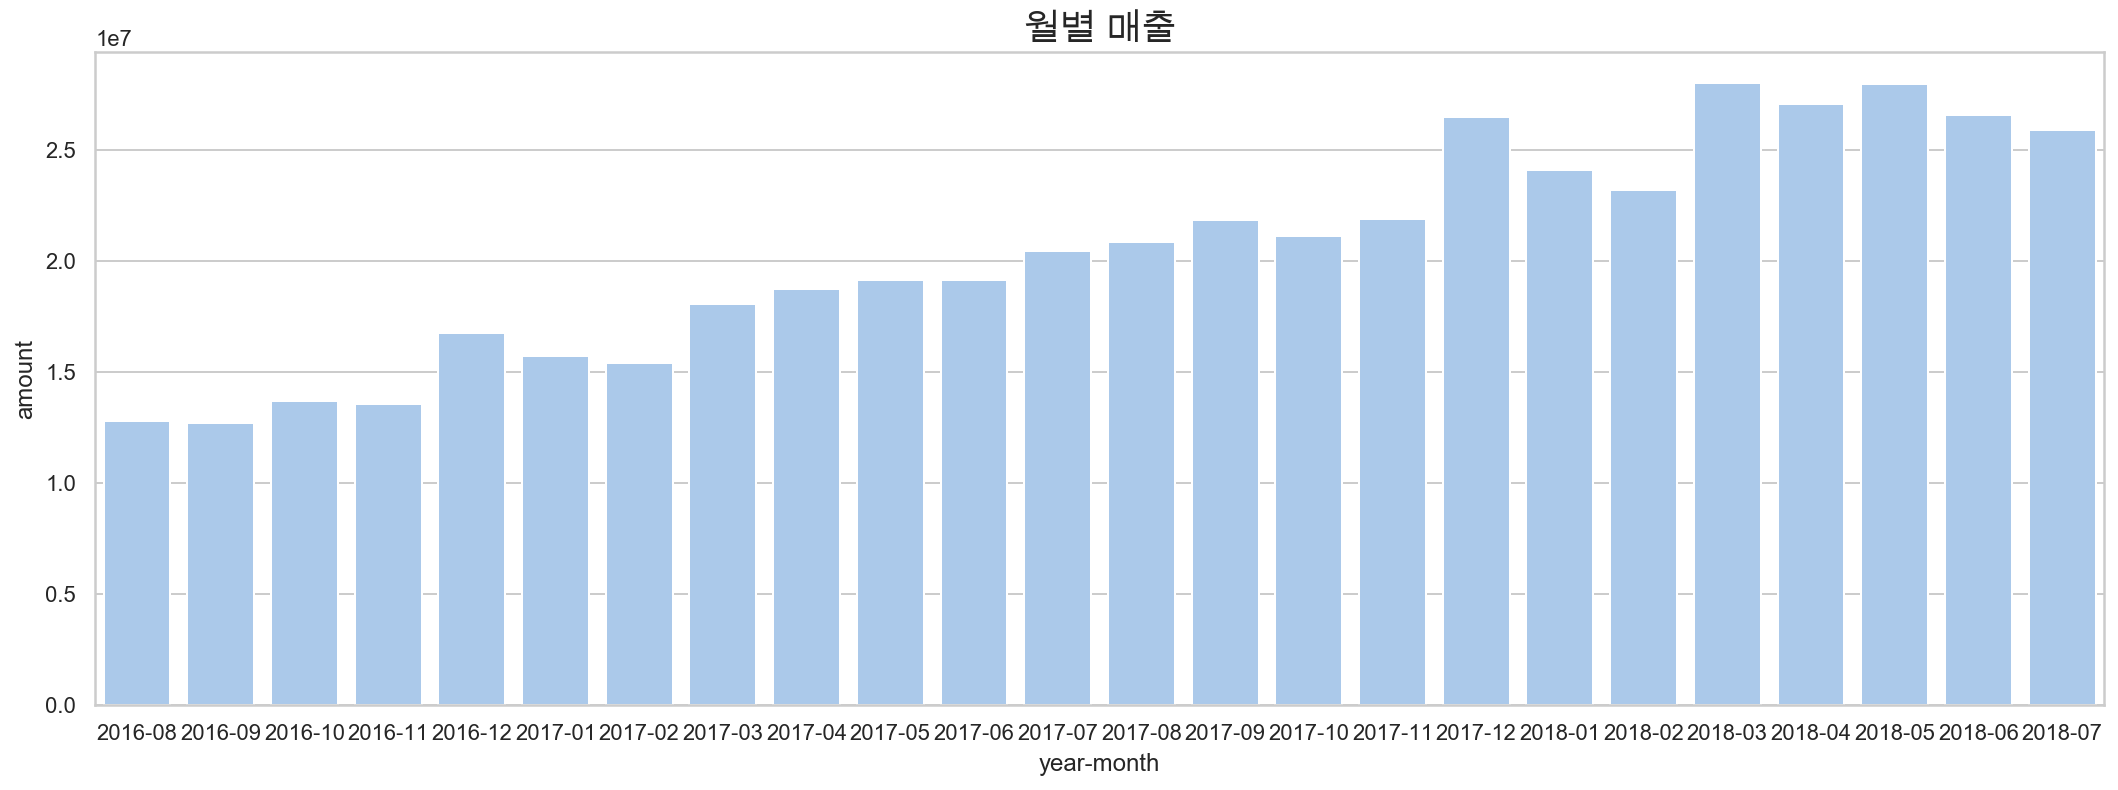

In [33]:
plt.figure(figsize=(18, 6))
plt.title("월별 매출", fontsize=18)
sns.barplot(x="year-month", y="amount", data=monthly_sales, color="b");

In [34]:
ex = train[train['holyday']==1]
holiday_list = ex.date.unique()
d = np.timedelta64(1, 'D')
type(d)

numpy.timedelta64

In [39]:
train["amount"].describe()

count    3.362796e+06
mean     1.459623e+02
std      6.017306e+02
min     -2.500000e+05
25%      3.200000e+01
50%      7.500000e+01
75%      1.500000e+02
max      2.500000e+05
Name: amount, dtype: float64

In [ ]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [40]:
from sklearn.preprocessing import MinMaxScaler


In [41]:
data = train["amount"]
scaler = MinMaxScaler()
print(scaler.fit(data))
MinMaxScaler()
print(scaler.data_max_)

print(scaler.transform(data))

print(scaler.transform([[2, 2]]))
[[1.5 0. ]]

SyntaxError: invalid syntax (<ipython-input-41-d68b141900d5>, line 10)

In [43]:
import plotly.offline as py
import plotly.graph_objs as go

In [45]:
def generate_color():
    color = '#{:02x}{:02x}{:02x}'.format(*map(lambda x: random.randint(0, 255), range(3)))
    return color

In [56]:
data = [
    go.Bar(
        x = unique_train['Columns'],
        y = unique_train['Unique_value'],
        name = 'Unique value in features',
        textfont=dict(size=20),
        marker=dict(
        line=dict(
            color= generate_color(),
            #width= 2,
        ), opacity = 0.45
    )
    ),
    ]
layout= go.Layout(
        title= "Unique Value By Column",
        xaxis= dict(title='Columns', ticklen=5, zeroline=False, gridwidth=2),
        yaxis= dict(title='Value Count', ticklen=5, gridwidth=2),
        showlegend=True
    )
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='skin')

In [ ]:


trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
data = [trace0, trace1]

py.iplot(data, filename = 'basic-line')
